<a href="https://colab.research.google.com/github/sharmashubham99/AI_inDashAndDine/blob/main/TUD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

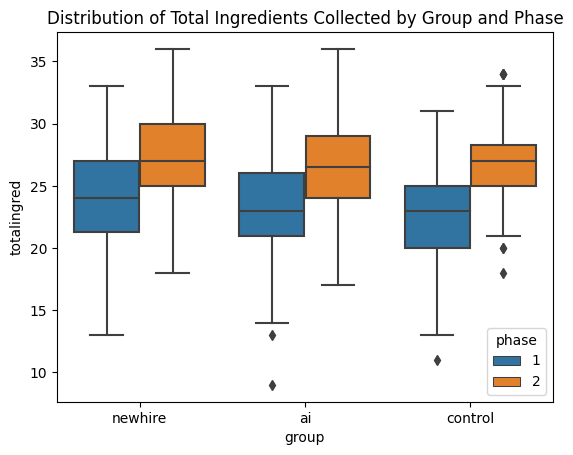

              sum_sq    df         F    PR(>F)
C(group)   14.404125   2.0  2.004847  0.144959
Residual  186.800926  52.0       NaN       NaN


In [ ]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load and preview the dataset
file_path = '/content/mario.csv'
mario_data = pd.read_csv(file_path)
mario_data.head()

# Descriptive statistics and box plot
desc_stats = mario_data.describe()
sns.boxplot(x='group', y='totalingred', hue='phase', data=mario_data)
plt.title('Distribution of Total Ingredients Collected by Group and Phase')
plt.show()

# ANOVA test
avg_ingred_per_phase = mario_data.groupby(['team_id', 'group', 'phase'])['totalingred'].mean().unstack()
avg_ingred_per_phase['performance_diff'] = avg_ingred_per_phase[2] - avg_ingred_per_phase[1]
performance_diff_df = avg_ingred_per_phase.reset_index()
model = ols('performance_diff ~ C(group)', data=performance_diff_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)
